# Essential Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the Dataset:

Dataset from Data.gov.sg <br>
Source: https://data.gov.sg/dataset/resale-flat-prices <br>
File: resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv is used as it is the most recent data

In [2]:
houseData = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
houseData["flat_id"] = houseData.index
houseData.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,4


# Data Cleaning and Preprocessing:

In [3]:
def flat_type(x):
    if x == "1 ROOM":
        return 1
    elif x == "2 ROOM":
        return 2
    elif x == "3 ROOM":
        return 3
    elif x == "4 ROOM":
        return 4
    elif x == "5 ROOM":
        return 5
    elif x == "EXECUTIVE":
        return 6
    else:
        return 7    

In [4]:
def storey_range(x):
    return float(x[:2])

In [5]:
temp = houseData.groupby("flat_model").resale_price.median()
temp = temp.sort_values()
temp = temp.index
temp

Index(['2-room', 'Standard', 'New Generation', 'Simplified', 'Model A2',
       'Model A', 'Improved', 'Premium Apartment', 'Apartment', 'Maisonette',
       'Adjoined flat', 'Improved-Maisonette', 'Model A-Maisonette', 'DBSS',
       'Premium Maisonette', 'Multi Generation', 'Terrace',
       'Premium Apartment Loft', 'Type S1', 'Type S2'],
      dtype='object', name='flat_model')

In [6]:
T = {'2-room': 0, 'Standard': 1, 'New Generation': 2, 'Simplified': 3, 'Model A2': 4,
       'Model A': 5, 'Improved': 6, 'Premium Apartment': 7, 'Apartment': 8, 'Maisonette': 9,
       'Adjoined flat': 10, 'Improved-Maisonette': 11, 'Model A-Maisonette': 12, 'DBSS': 13,
       'Premium Maisonette': 14, 'Multi Generation': 15, 'Terrace': 16,
       'Premium Apartment Loft': 17, 'Type S1': 18, 'Type S2': 19}

In [7]:
def remaining_lease(x):
    years = float(x[:2])
    months = x[9:11]
    if months == '':
        months = 0
    else:
        months = float(months)
    
    return years + round((months/12),2)

In [8]:
df = houseData.copy()
df["flat_type"] = df["flat_type"].apply(lambda x: flat_type(x))
df["storey_range"] = df["storey_range"].apply(lambda x: storey_range(x))
df["flat_model"] = df["flat_model"].replace(T)
df["remaining_lease"] = df["remaining_lease"].apply(lambda x: remaining_lease(x))

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,2017-01,ANG MO KIO,2,406,ANG MO KIO AVE 10,10.0,44.0,6,1979,61.33,232000.0,0
1,2017-01,ANG MO KIO,3,108,ANG MO KIO AVE 4,1.0,67.0,2,1978,60.58,250000.0,1
2,2017-01,ANG MO KIO,3,602,ANG MO KIO AVE 5,1.0,67.0,2,1980,62.42,262000.0,2
3,2017-01,ANG MO KIO,3,465,ANG MO KIO AVE 10,4.0,68.0,2,1980,62.08,265000.0,3
4,2017-01,ANG MO KIO,3,601,ANG MO KIO AVE 5,1.0,67.0,2,1980,62.42,265000.0,4


# Data Visualisation:

In [9]:
df['town'].value_counts().sort_index()

ANG MO KIO          5285
BEDOK               6833
BISHAN              2445
BUKIT BATOK         4161
BUKIT MERAH         4887
BUKIT PANJANG       4920
BUKIT TIMAH          338
CENTRAL AREA        1050
CHOA CHU KANG       5691
CLEMENTI            2891
GEYLANG             3113
HOUGANG             6179
JURONG EAST         2669
JURONG WEST         8395
KALLANG/WHAMPOA     3684
MARINE PARADE        780
PASIR RIS           3919
PUNGGOL             9177
QUEENSTOWN          3599
SEMBAWANG           2934
SENGKANG           10647
SERANGOON           2415
TAMPINES            8494
TOA PAYOH           4028
WOODLANDS           8530
YISHUN              8400
Name: town, dtype: int64

In [10]:
df_vis = df.loc[:, ['town','resale_price']]
df_vis = df_vis.groupby('town').median()
df_vis = df_vis.reset_index()
df_vis.head()

,town,resale_price
0,ANG MO KIO,357000.0
1,BEDOK,383000.0
2,BISHAN,630000.0
3,BUKIT BATOK,375000.0
4,BUKIT MERAH,598000.0


By using CDXZipStream to find the coordinates of the towns:

In [11]:
town = ['ANG MO KIO',
'BEDOK',
'BISHAN',
'BUKIT BATOK',
'BUKIT MERAH',
'BUKIT PANJANG',
'BUKIT TIMAH',
'CENTRAL AREA',
'CHOA CHU KANG',
'CLEMENTI',
'GEYLANG',
'HOUGANG',
'JURONG EAST',
'JURONG WEST',
'KALLANG/WHAMPOA',
'MARINE PARADE',
'PASIR RIS',
'PUNGGOL',
'QUEENSTOWN',
'SEMBAWANG',
'SENGKANG',
'SERANGOON',
'TAMPINES',
'TOA PAYOH',
'WOODLANDS',
'YISHUN'
]

latitude = [1.37164998054504,
1.32425999641418,
1.35079002380371,
1.34951996803284,
1.28583002090454,
1.37876999378204,
1.34040999412537,
1.29166996479034,
1.38616001605988,
1.31438004970551,
1.31147003173828,
1.37114000320435,
1.3343700170517,
1.3394900560379,
1.31,
1.30306005477905,
1.37194001674652,
1.40245997905731,
1.2942,
1.44793999195099,
1.3868,
1.3554,
1.36819005012512,
1.33448004722595,
1.4382,
1.43621003627777
]

longitude = [103.845459,
103.9529572,
103.8510971,
103.7527695,
103.8190002,
103.7697678,
103.7722092,
103.8499985,
103.7461777,
103.7653732,
103.8821793,
103.8914413,
103.7436676,
103.7073898,
103.8651,
103.9079971,
103.9499435,
103.9068604,
103.7861,
103.8189087,
103.8914,
103.8679,
103.9294815,
103.8510818,
103.789,
103.8358231
]

df_vis['latitude'] = latitude
df_vis['longitude'] = longitude

df_vis

,town,resale_price,latitude,longitude
0,ANG MO KIO,357000.0,1.37165,103.845459
1,BEDOK,383000.0,1.32426,103.952957
2,BISHAN,630000.0,1.35079,103.851097
3,BUKIT BATOK,375000.0,1.34952,103.752769
4,BUKIT MERAH,598000.0,1.28583,103.819000
5,BUKIT PANJANG,438000.0,1.37877,103.769768
6,BUKIT TIMAH,713888.0,1.34041,103.772209
7,CENTRAL AREA,535000.0,1.29167,103.849998
8,CHOA CHU KANG,418000.0,1.38616,103.746178
9,CLEMENTI,438000.0,1.31438,103.765373


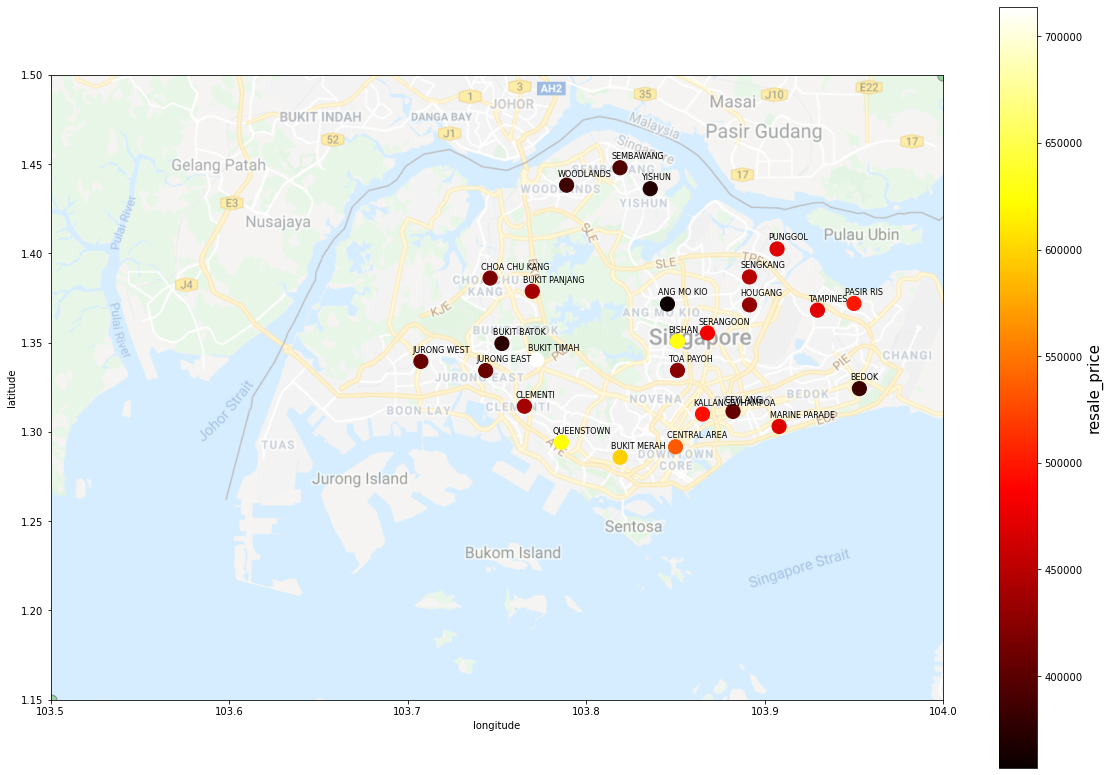

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import our image 
singapore_img = mpimg.imread('Singapore Map.png')
f, axes = plt.subplots(1, 1, figsize=(20,14))
# plot the data
types = df_vis['town']
x_coords = df_vis['longitude']
y_coords = df_vis['latitude']
z = df_vis['resale_price']

plt.scatter(x_coords, y_coords, marker='o', s=200 , c=z, cmap='hot',  alpha=10)

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i] 
    plt.text(x-0.005, y+0.005, type, fontsize=8)

clb=plt.colorbar()
clb.set_label('resale_price', fontsize=15)

# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("latitude", fontsize=10)
plt.xlabel("longitude", fontsize=10)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)

plt.show()

Flats at Bukit Merah, Kallang/Whampoa, Queenstown, Central Area are chosen for anomaly detection.

# Anomaly Detection:

In [13]:
near_cbd = ['QUEENSTOWN','BUKIT MERAH','CENTRAL AREA','KALLANG/WHAMPOA']
df = df[df["town"].isin(near_cbd)]

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
195,2017-01,BUKIT MERAH,2,10,JLN BT HO SWEE,7.0,34.0,1,1971,53.50,218000.0,195
196,2017-01,BUKIT MERAH,2,2,JLN BT HO SWEE,7.0,34.0,1,1971,53.50,230000.0,196
197,2017-01,BUKIT MERAH,2,45,TELOK BLANGAH DR,7.0,45.0,6,1976,58.00,245000.0,197
198,2017-01,BUKIT MERAH,2,36,BEO CRES,7.0,51.0,1,1971,53.50,300000.0,198
199,2017-01,BUKIT MERAH,3,20,TELOK BLANGAH CRES,4.0,65.0,6,1975,57.17,295000.0,199


In [14]:
features = ["flat_type", "storey_range", "floor_area_sqm", "flat_model", 
            "lease_commence_date", "remaining_lease", "resale_price"]

df_norm = df.copy()

for i in range(len(features)):
    column = features[i]
    df_norm[column] = (df_norm[column]-df_norm[column].min()) / (df_norm[column].max()-df_norm[column].min()) + 10**-10

df_norm.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
195,2017-01,BUKIT MERAH,0.2,10,JLN BT HO SWEE,0.1250,0.013761,1.000000e-10,0.076923,0.179340,0.049517,195
196,2017-01,BUKIT MERAH,0.2,2,JLN BT HO SWEE,0.1250,0.013761,1.000000e-10,0.076923,0.179340,0.059259,196
197,2017-01,BUKIT MERAH,0.2,45,TELOK BLANGAH DR,0.1250,0.064220,2.777778e-01,0.173077,0.262797,0.071435,197
198,2017-01,BUKIT MERAH,0.2,36,BEO CRES,0.1250,0.091743,1.000000e-10,0.076923,0.179340,0.116082,198
199,2017-01,BUKIT MERAH,0.4,20,TELOK BLANGAH CRES,0.0625,0.155963,2.777778e-01,0.153846,0.247404,0.112023,199


In [15]:
df1 = pd.DataFrame(df["flat_id"])

<AxesSubplot:>

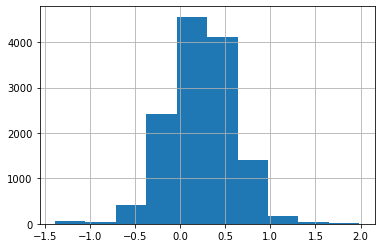

In [16]:
df1["x1"] = np.log((df_norm["flat_type"]**2)/df_norm["resale_price"]+0.25)
df1["x1"].hist(bins=10)

<AxesSubplot:>

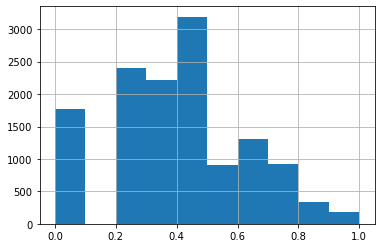

In [17]:
df1["x2"] = np.sqrt(df_norm["storey_range"])
df1["x2"].hist(bins=10)

<AxesSubplot:>

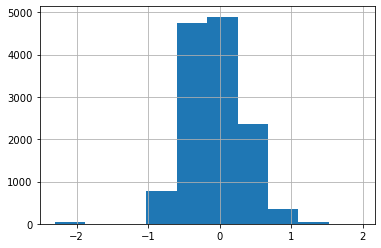

In [18]:
df1["x3"] = np.log(df_norm["floor_area_sqm"]/df_norm["resale_price"]+0.1)
df1["x3"].hist(bins=10)

<AxesSubplot:>

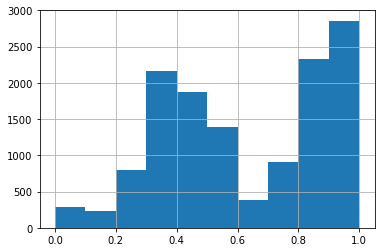

In [19]:
df1["x4"] = np.sqrt(df_norm["lease_commence_date"])
df1["x4"].hist(bins=10)

<AxesSubplot:>

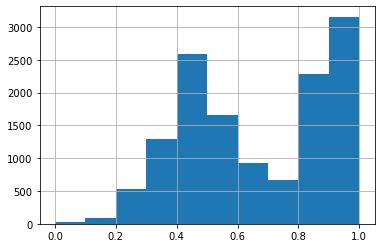

In [20]:
df1["x5"] = np.sqrt(df_norm["remaining_lease"])
df1["x5"].hist(bins=10)

<AxesSubplot:>

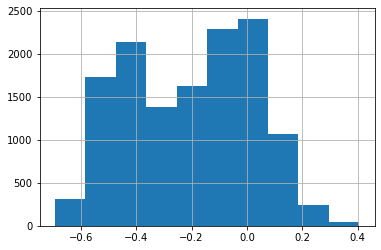

In [21]:
df1["x6"] = np.log(df_norm["resale_price"]+0.5)
df1["x6"].hist(bins=10)

In [22]:
df1.head()

,flat_id,x1,x2,x3,x4,x5,x6
195,195,0.056187,0.353553,-0.973095,0.277350,0.423485,-0.598715
196,196,-0.077953,0.353553,-1.101936,0.277350,0.423485,-0.581143
197,197,-0.210783,0.353553,-0.000999,0.416025,0.512637,-0.559605
198,198,-0.519893,0.353553,-0.116162,0.277350,0.423485,-0.484375
199,199,0.517768,0.250000,0.400280,0.392232,0.497397,-0.490985


In [23]:
import scipy.stats

def est_parameter(dataset):
    mu = np.mean(dataset)
    sigma = np.std(dataset)
    return mu, sigma

def calculate_p(x, mu, sigma):
    return scipy.stats.norm(mu, sigma).pdf(x)

n = 6
for i in range(1, n+1):
    mu, sigma = est_parameter(df1["x"+str(i)])
    df1["p"+str(i)] = df1["x"+str(i)].apply(lambda x: calculate_p(x, mu, sigma))


In [24]:
df1.head()

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6
195,195,0.056187,0.353553,-0.973095,0.277350,0.423485,-0.598715,0.975857,1.725407,0.079384,0.637909,1.017723,0.384279
196,196,-0.077953,0.353553,-1.101936,0.277350,0.423485,-0.581143,0.757654,1.725407,0.036724,0.637909,1.017723,0.438701
197,197,-0.210783,0.353553,-0.000999,0.416025,0.512637,-0.559605,0.514852,1.725407,0.977491,1.110538,1.388241,0.511810
198,198,-0.519893,0.353553,-0.116162,0.277350,0.423485,-0.484375,0.124206,1.725407,0.984712,0.637909,1.017723,0.816709
199,199,0.517768,0.250000,0.400280,0.392232,0.497397,-0.490985,0.813811,1.407891,0.502342,1.029891,1.329919,0.787330


In [25]:
df1["px"] = df1["p1"]*df1["p2"]*df1["p3"]*df1["p4"]*df1["p5"]*df1["p6"]

df1.head()

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6,px
195,195,0.056187,0.353553,-0.973095,0.277350,0.423485,-0.598715,0.975857,1.725407,0.079384,0.637909,1.017723,0.384279,0.033346
196,196,-0.077953,0.353553,-1.101936,0.277350,0.423485,-0.581143,0.757654,1.725407,0.036724,0.637909,1.017723,0.438701,0.013673
197,197,-0.210783,0.353553,-0.000999,0.416025,0.512637,-0.559605,0.514852,1.725407,0.977491,1.110538,1.388241,0.511810,0.685162
198,198,-0.519893,0.353553,-0.116162,0.277350,0.423485,-0.484375,0.124206,1.725407,0.984712,0.637909,1.017723,0.816709,0.111892
199,199,0.517768,0.250000,0.400280,0.392232,0.497397,-0.490985,0.813811,1.407891,0.502342,1.029891,1.329919,0.787330,0.620677


In [26]:
anomaly = df1[df1["px"] < 10**-4]
anomaly = anomaly.sort_values("flat_id")
anomaly

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6,px
2572,2572,-1.386294,0.000010,-2.302585,0.392232,0.494217,-0.625665,0.000047,0.362609,2.014025e-07,1.029891,1.317368,0.309985,1.437504e-12
2573,2573,-1.386294,0.000010,-2.302585,0.392232,0.494217,-0.598715,0.000047,0.362609,2.014025e-07,1.029891,1.317368,0.384279,1.782032e-12
6324,6324,-1.386294,0.353553,-2.302585,0.392232,0.491017,-0.600193,0.000047,1.725407,2.014025e-07,1.029891,1.304616,0.379917,8.302056e-12
6971,6971,1.378491,0.000010,1.017223,0.277350,0.404903,-0.610603,0.007440,0.362609,2.593577e-02,0.637909,0.936889,0.350144,1.464181e-05
8844,8844,1.378491,0.000010,1.017223,0.240192,0.389257,-0.610603,0.007440,0.362609,2.593577e-02,0.524520,0.869617,0.350144,1.117476e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100826,100826,1.247372,0.000010,0.882084,0.240192,0.291764,-0.598715,0.021938,0.362609,6.069712e-02,0.524520,0.494891,0.384279,4.816354e-05
105477,105477,1.057106,0.353553,0.826367,0.000010,0.152258,-0.578245,0.083373,1.725407,8.339737e-02,0.091527,0.163966,0.448133,8.068172e-05
117903,117903,-1.386294,0.250000,-2.302585,0.392232,0.391158,-0.622634,0.000047,1.407891,2.014025e-07,1.029891,0.877733,0.317790,3.812367e-12
117904,117904,-1.386294,0.353553,-2.302585,0.392232,0.389257,-0.584051,0.000047,1.725407,2.014025e-07,1.029891,0.869617,0.429371,6.254245e-12


In [27]:
P = {"pmin":[], "pmax":[], "pmean":[]}

for i in range(1, n+1):
    P["pmin"].append(df1["p"+str(i)].min())
    P["pmax"].append(df1["p"+str(i)].max())
    P["pmean"].append(df1["p"+str(i)].mean())

pdata = pd.DataFrame(P)
pdata

,pmin,pmax,pmean
0,8.857849e-06,1.103785,0.793680
1,5.322834e-02,1.749094,1.248709
2,2.014025e-07,0.991521,0.708463
3,9.152696e-02,1.515639,0.993729
4,3.290614e-02,1.693933,1.097560
5,4.723693e-02,1.762193,1.169553


In [28]:
anomaly_df = anomaly.loc[:, ["flat_id", "px"]]
anomaly_df = anomaly_df.set_index("flat_id")

result = df.join(anomaly_df, on="flat_id", how="inner")
result

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id,px
2572,2017-03,BUKIT MERAH,1,7,TELOK BLANGAH CRES,1.0,31.0,6,1975,57.00,200000.0,2572,1.437504e-12
2573,2017-03,BUKIT MERAH,1,7,TELOK BLANGAH CRES,1.0,31.0,6,1975,57.00,218000.0,2573,1.782032e-12
6324,2017-05,BUKIT MERAH,1,7,TELOK BLANGAH CRES,7.0,31.0,6,1975,56.83,217000.0,6324,8.302056e-12
6971,2017-05,KALLANG/WHAMPOA,3,28,JLN BAHAGIA,1.0,56.0,1,1971,52.67,210000.0,6971,1.464181e-05
8844,2017-06,KALLANG/WHAMPOA,3,27,JLN BAHAGIA,1.0,56.0,1,1970,52.00,210000.0,8844,1.117476e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100826,2021-02,KALLANG/WHAMPOA,3,33,JLN BAHAGIA,1.0,56.0,1,1970,48.42,218000.0,100826,4.816354e-05
105477,2021-01,QUEENSTOWN,3,82,C'WEALTH CL,7.0,60.0,1,1967,45.08,232000.0,105477,8.068172e-05
117903,2022-03,BUKIT MERAH,1,7,TELOK BLANGAH CRES,4.0,31.0,6,1975,52.08,202000.0,117903,3.812367e-12
117904,2022-03,BUKIT MERAH,1,7,TELOK BLANGAH CRES,7.0,31.0,6,1975,52.00,228000.0,117904,6.254245e-12


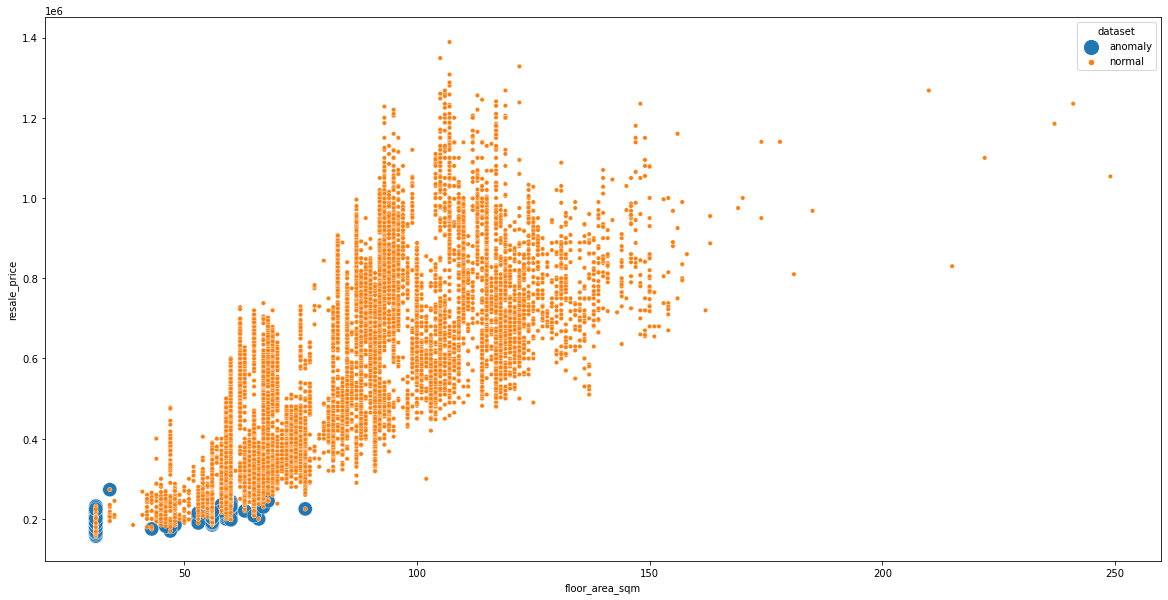

In [44]:
#Analyse flat_type = 3 ROOM which are anomalies as an exmaple:
import seaborn as sb

temp1 = result
temp2 = df

con = pd.concat([temp1.assign(dataset='anomaly'), temp2.assign(dataset='normal')])

plt.figure(figsize = (20,10))
sb.scatterplot(x='floor_area_sqm', y='resale_price', data=con, hue='dataset', 
               size='dataset', sizes=(20, 200)) 

plt.show()

<AxesSubplot:xlabel='flat_model', ylabel='resale_price'>

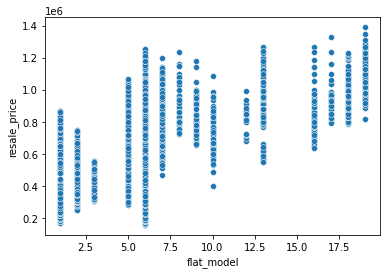

In [36]:
#Appendix:

sb.scatterplot(x= df["flat_model"], y=df["resale_price"])

In [37]:
from scipy import stats
stats.pearsonr(df["flat_model"], df["resale_price"])

(0.4784649111235163, 0.0)